# Métricas de Classificação

## 1. Introdução
Métricas de classificação são fundamentais para avaliar o desempenho de um modelo em tarefas de classificação. 
Eles ajudam a entender não apenas se o modelo está fazendo previsões corretas, mas também se essas previsões são 
relevantes para o problema em questão.


In [7]:
## 2. Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, f1_score, roc_curve, roc_auc_score, classification_report)


In [8]:
## 3. Preparação dos Dados
# Criar um dataset sintético
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=1000, random_state=42)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
## 4. Treinamento de um modelo simples
# Treinar um modelo de regressão logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logreg.predict(X_test)


---
### Acurácia
#### Descrição
A acurácia é a métrica mais simples e direta para avaliar o desempenho de um modelo de classificação.
É definido como a proporção de observações classificadas corretamente.
#### Formula
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
---
### Precisão
#### Descrição
A precisão é a proporção de observações classificadas como positivas que realmente são positivas.
#### Formula
$$
Precision = \frac{TP}{TP + FP}
$$
---
### Recall
#### Descrição
O recall é a proporção de observações positivas que são classificadas corretamente.

#### Formula
$$
Recall = \frac{TP}{TP + FN}
$$
---
### F1 Score
#### Descrição
O F1 Score é a média harmônica entre precisão e recall. É uma métrica útil para avaliar o desempenho de um modelo
quando há um desequilíbrio de classe.

#### Formula
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
---


In [13]:
## 5. Métricas Básicas
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular precisão, recall e F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Acurácia: {:.2f}'.format(accuracy))
print('Precisão: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

Acurácia: 0.88
Precisão: 0.93
Recall: 0.84
F1-score: 0.88


### Curva ROC
#### Descrição
A curva ROC é uma ferramenta útil para entender o desempenho de um modelo de classificação em diferentes níveis de
threshold. A curva ROC é construída traçando a taxa de verdadeiros positivos (TPR) contra a taxa de falsos positivos
(FPR) em vários níveis de threshold.

#### Formula
$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$
---

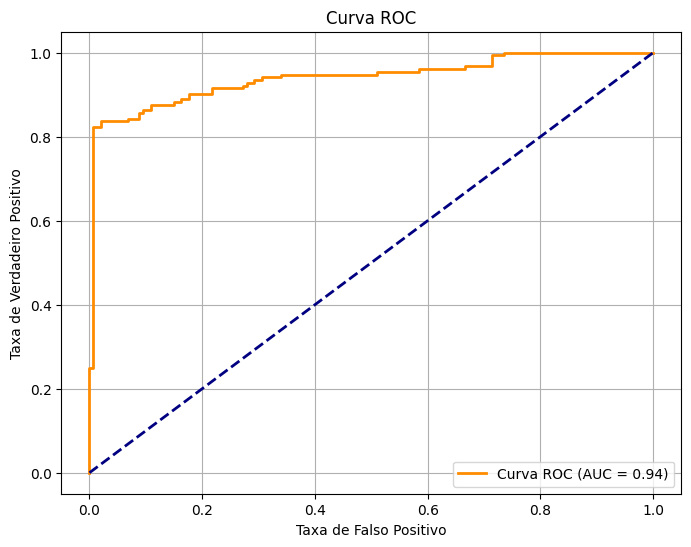

In [15]:
## 6. Métricas Avançadas (para classificação binária)
# Calcular a probabilidade das previsões
y_prob = logreg.predict_proba(X_test)[:, 1]

# Obter a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a AUC
auc = roc_auc_score(y_test, y_prob)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [12]:
## 7. Relatório de Classificação

# Gerar o relatório de classificação
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       147
           1       0.93      0.84      0.88       153

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



## 8. Conclusão
As métricas de classificação oferecem uma visão detalhada do desempenho do modelo. Escolher as métricas corretas é crucial, 
dependendo do problema e dos objetivos específicos.
